### Case Study – 2

#### Objectives:
• Learn to use Cross-validation to pick the best models.

#### Questions:
1. Load the data from “glass.csv” and make a bar plot of different types of glasses.

2. Make a train_test split and fit a single decision tree classifier.

3. Make a k-fold split with 3 splits and measure the accuracy score with each split

[Hint: Refer to KFold module under sklearn’s model selection.]

4. Use gridSearchCV from sklearn for finding out a suitable number of estimators
for a RandomForestClassifer along with 10-fold cross-validation.

[Hint: Define a range of estimators and feed in range as param_grid]

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
# 1. Load the data from “glass.csv” and make a bar plot of different types of glasses.
df=pd.read_csv("data/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<BarContainer object of 6 artists>

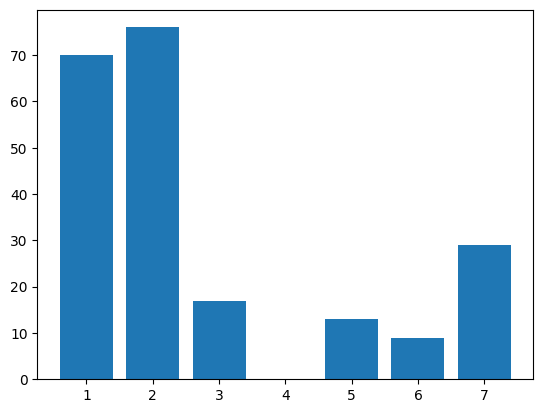

In [9]:
unique_types_count=df["Type"].value_counts()

plt.bar(unique_types_count.index, unique_types_count.values)

In [20]:
# 2. Make a train_test split and fit a single decision tree classifier.
X=df.drop("Type", axis=1)
y=df["Type"]

X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42, test_size=.20)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

print(accuracy_score(y_test, y_predict))


0.7906976744186046


In [30]:
# 3. Make a k-fold split with 3 splits and measure the accuracy score with each split
kfold=KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model.fit(X_train, y_train)
    y_predict=model.predict(X_test)

    print(accuracy_score(y_test, y_predict[0: ]))
    
print(cross_val_score(model, X, Y, cv=3, scoring="accuracy").mean())

0.013888888888888888
0.28169014084507044
0.028169014084507043
0.588810641627543


In [27]:
# 4. Use gridSearchCV from sklearn for finding out a suitable number of estimators
# for a RandomForestClassifer along with 10-fold cross-validation.

parameter_candidates = [{1}, {2}]
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model=RandomForestClassifier( n_jobs=-1, max_features='sqrt', n_estimators=50, oob_score=True)

CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
CV_rfc.fit(X, Y)
print(CV_rfc.best_params_)

C:\Users\736944\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\736944\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\736944\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

{'max_features': 'auto', 'n_estimators': 100}


C:\Users\736944\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [28]:
rf_model = RandomForestClassifier(
    n_jobs=-1, max_features='auto', n_estimators=100, oob_score=True)

In [31]:
print(cross_val_score(rf_model, X, Y, cv=3, scoring="accuracy").mean())

C:\Users\736944\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\736944\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6917709963484612


C:\Users\736944\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
